In [3]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np

In [44]:
df = yf.download("BTC-USD", start="2021-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [45]:
sma_12 = df['Close'].rolling(12).mean()
sma_26 = df['Close'].rolling(26).mean()

In [48]:
df['sma_12'] = sma_12
df['sma_26'] = sma_26

In [51]:
sma_short = mpf.make_addplot(df['sma_12'], color='orange')
sma_long = mpf.make_addplot(df['sma_26'], color='y')
sma_list = [sma_short, sma_long]

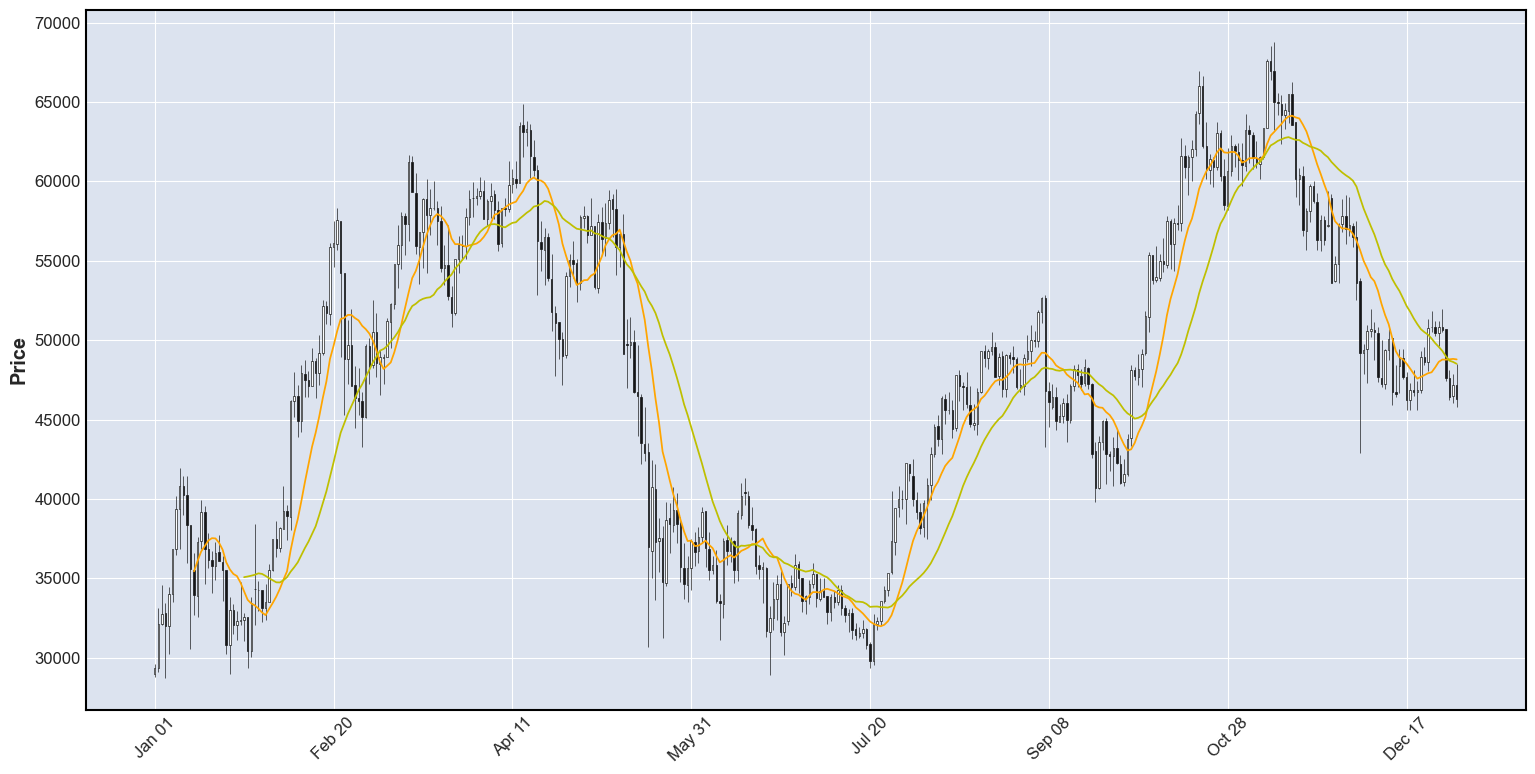

In [52]:
mpf.plot(df, type='candle', addplot=sma_list, figsize=(20,10))

In [53]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26
Date,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901


In [54]:
df['trend'] = df['sma_12'] > df['sma_26']

In [55]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26,trend
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982,False
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869,False
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True


In [56]:
df['shift trend'] = df['trend'].shift(1)

In [57]:
df

,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26,trend,shift trend
Date,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,False,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,False,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,False,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,False,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,48779.607747,49323.519982,False,False
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,48773.226888,48981.636869,False,False
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,48793.440755,48706.500901,True,False


In [60]:
df.loc[(df['trend']==True)&(df['shift trend']==False),'action'] = 'buy'
df.loc[(df['trend']==False)&(df['shift trend']==True),'action'] = 'sell'

In [63]:
# add marker
df.loc[(df['action'])=='buy', 'marker_position'] = df['Low']*0.95
df.loc[(df['action'])=='sell', 'marker_position'] = df['High']*1.05

In [67]:
b = df[df['action']=='buy']
s = df[df['action']=='sell']

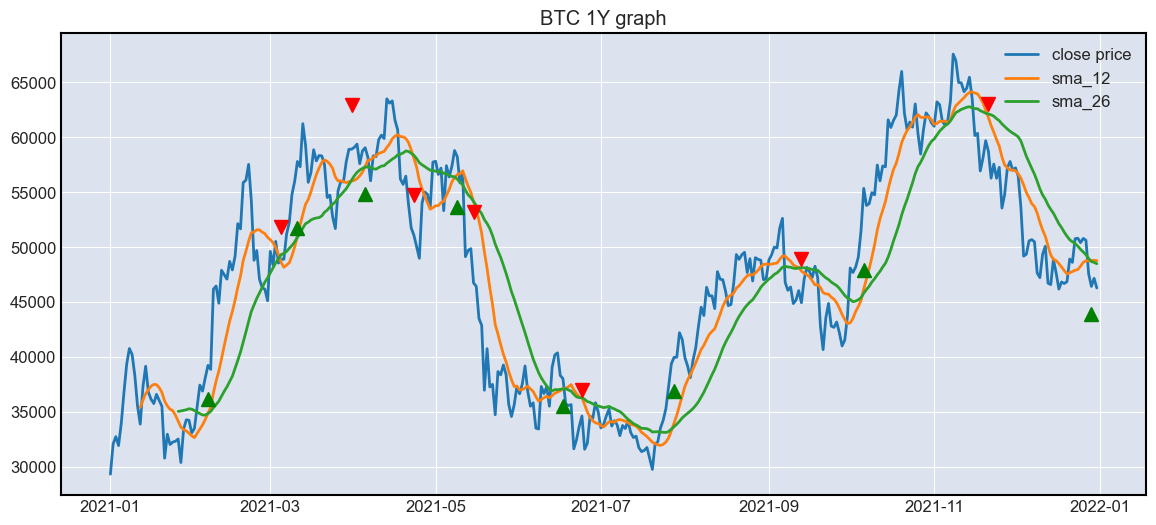

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.title('BTC 1Y graph')
plt.plot(df['Close'], label='close price')
plt.plot(df['sma_12'], label='sma_12')
plt.plot(df['sma_26'], label='sma_26')
plt.plot(b['marker_position'], 'g^', markersize=10)
plt.plot(s['marker_position'], 'rv', markersize=10)
plt.legend()